In [19]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random
import math

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

import plotly

plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)

In [20]:
#Cell_2.
csv_in="8316_2018.csv"
df=pd.read_csv(csv_in,skiprows=1,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['日付'][0]))
df['日付']=pd.to_datetime(df['日付'])
print(type(df['日付'][0]))

(105, 7)
           日付    始値    高値    安値    終値       出来高  終値調整値
0  2018-01-04  4949  5015  4946  5013   9066700   5013
1  2018-01-05  5071  5134  5067  5095  10985300   5095
2  2018-01-09  5190  5203  5078  5090   7822700   5090
3  2018-01-10  5182  5215  5168  5177   9731100   5177
4  2018-01-11  5230  5242  5178  5228   8621500   5228
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [25]:
#Cell_3.
df_d=df.copy()
df_d['日付']-=df_d['日付'][0]
print(type(df_d['日付'][0]))
df_d['日付']/=np.timedelta64(1,'D')
print(type(df_d['日付'][0]))
print(df_d.head())

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'numpy.float64'>
    日付    始値    高値    安値    終値       出来高  終値調整値
0  0.0  4949  5015  4946  5013   9066700   5013
1  1.0  5071  5134  5067  5095  10985300   5095
2  5.0  5190  5203  5078  5090   7822700   5090
3  6.0  5182  5215  5168  5177   9731100   5177
4  7.0  5230  5242  5178  5228   8621500   5228


In [27]:
#Cell_4.
print(type(df_d))
df_d=np.asarray(df_d)
print(type(df_d))
print(df_d.shape)
X=df_d[:,:1]
Y=df_d[:,4]
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(105, 7)
(105, 1)
(105,)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.48e-18
Time:                        18:44:12   Log-Likelihood:                -690.71
No. Observations:                 105   AIC:                             1385.
Df Residuals:                     103   BIC:                             1391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5012.4918     33.881    147.943      0.0

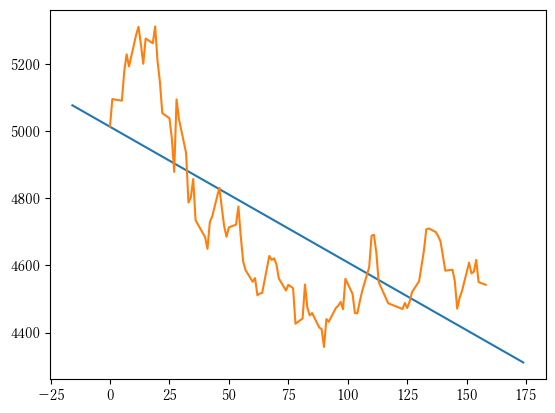

In [30]:
#Cell_5.
import statsmodels.api as sm

X=sm.add_constant(X)
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())
c=results.params[0]
a=results.params[1]

min_df=min(df_d[:,0])
max_df=max(df_d[:,0])
w_df=max_df-min_df
xx=np.linspace(min_df-0.1*w_df,max_df+0.1*w_df,20)
print(c,a)
#print(xx)
yy=c+a*xx
plt.plot(xx,yy)
plt.plot(df_d[:,0],Y)
plt.show()

In [32]:
#Cell_7.
obs=Y#df_d['終値']

In [33]:
#Cell_8.
len(obs)

105

observation is: 5013.0
Predicted next value is: 5008.708667773455
observation is: 5095.0
Predicted next value is: 5090.9627624849545
observation is: 5090.0
Predicted next value is: 5120.238604754333
observation is: 5177.0
Predicted next value is: 5221.351370402114
observation is: 5228.0
Predicted next value is: 5287.044441884259
observation is: 5192.0
Predicted next value is: 5228.953311130437
observation is: 5286.0
Predicted next value is: 5315.194776245851
observation is: 5310.0
Predicted next value is: 5351.076969952185
observation is: 5258.0
Predicted next value is: 5274.643437841203
observation is: 5200.0
Predicted next value is: 5176.518431461532
observation is: 5275.0
Predicted next value is: 5258.865272059244
observation is: 5261.0
Predicted next value is: 5268.138828963448
observation is: 5311.0
Predicted next value is: 5329.330816606721
observation is: 5208.0
Predicted next value is: 5205.941279690188
observation is: 5146.0
Predicted next value is: 5100.961841212162
observati

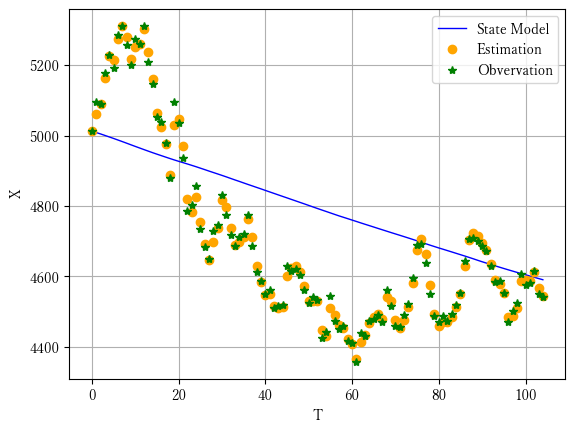

In [42]:
#Cell_9.
#https://wagtail.cds.tohoku.ac.jp/coda/python/stochastic-methods/kalman-filter-2.html

dt = 1
F = np.array([[1, dt],
              [0,1]])
G = np.array([[0],
              [math.sqrt(dt)]])
H = np.array([[1,0]])

x = np.zeros((2,1))
xt = np.zeros((2,1))#priorior estimator

#print(xt)

S = np.zeros((2,2))#priorior estimator

R = np.array([[0.01]])
Q = np.array([[0.01]])

x[0,0]=c
x[1,0]=a

#priorior estimators
xt[0,0]=c
xt[1,0]=a

#priorior estimators
S[0,0]=0.01
S[1,1]=0.01

T=[]
X=[]
XT=[]
ZT=[]

t=0
i=0
while i<len(obs):
    D = np.linalg.pinv(H.dot(S.dot(H.T)) + R)
    K = S.dot(H.T).dot(D) #Kalman gain.

    #Filtering step.
    zt = obs[int(i)]
    print('observation is:',zt)
    #posterior estimators.
    x2 = xt + K.dot(zt - H.dot(xt))
    S2 = (np.eye(2) - K.dot(H)).dot(S)

    T.append(t)
    X.append(x[0,0]) #'True' state
    XT.append(x2[0,0]) #estimated state (posterior)
    ZT.append(zt) #observation.

    #prediction step.
    #priorior estimators.
    xt = F.dot(x2)
    S = F.dot(S2.dot(F.T)) + G.dot(Q.dot(G.T))
    print('Predicted next value is:',xt[0,0])
    # update state. This cannot be observed.
    x = F.dot(x) + G.dot( np.random.multivariate_normal([0], R, 1).T )

    t = t + dt
    i+=1

plt.plot(T,X, color='blue', linewidth=1.0, label='State Model')
plt.plot(T,XT, 'o', color='orange', linewidth=1.0, label='Estimation')
plt.plot(T,ZT, '*',color='green',label='Obvervation')
plt.xlabel('T')
plt.ylabel('X')
plt.grid(True)
plt.legend()
plt.show()
